In [13]:
import numpy as np
import pandas as pd
import operator
import os
from sklearn import model_selection
import re

In [14]:
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [17]:
X = []
Y = []
for category in os.listdir("E:\\20_newsgroups"):
    for document in os.listdir("E:\\20_newsgroups\\"+ category):
        with open("E:\\20_newsgroups\\"+category+"\\"+ document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [18]:
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [19]:

x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [20]:
print(len(x_train))
print(len(x_test))

14997
5000


In [21]:
sample_text="Hey! I am Anshika. I am superb. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Anshika', 'I', 'am', 'superb', 'What', 'are', 'you', 'doing', 'there', '']


In [22]:
dic={}
for i in range(len(x_train)):
    word=x_train[i][1].lower()
    stripped=re.split(r'\W+',word)
    for s in stripped:
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'path': 15242,
 'cantaloupe': 19513,
 'srv': 24210,
 'cmu': 39200,
 'edu': 122711,
 'das': 4597,
 'news': 25654,
 'harvard': 5267,
 'noc': 4642,
 'near': 5148,
 'net': 19008,
 'howland': 8228,
 'reston': 8200,
 'ans': 8305,
 'spool': 441,
 'uunet': 4002,
 'newsflash': 163,
 'concordia': 267,
 'mizar': 67,
 'umanitoba': 224,
 'bison': 109,
 'baden': 61,
 'bari': 20,
 'newsgroups': 15316,
 'sci': 6605,
 'electronics': 1272,
 'subject': 16065,
 'board': 701,
 'quiry': 1,
 'message': 16452,
 'date': 15579,
 'sun': 3180,
 'apr': 15354,
 'cst': 72,
 'organization': 14846,
 'system': 4690,
 'bbs': 566,
 'winnipeg': 186,
 'manitoba': 55,
 'canada': 964,
 'lines': 15643,
 'got': 2037,
 'using': 2376,
 'measures': 124,
 'voltages': 11,
 'properly': 250,
 'power': 1877,
 'supply': 374,
 'reg': 32,
 'problem': 2785,
 'input': 360,
 'voltage': 156,
 'wish': 411,
 'lower': 344,
 'via': 745,
 'resistor': 55,
 'sensitivity': 75,
 'great': 1611,
 'can': 14713,
 'triger': 1,
 'holding': 190,
 'wire': 1

In [23]:
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122711),
 ('cmu', 39200),
 ('com', 37507),
 ('news', 25654),
 ('not', 24920),
 ('srv', 24210),
 ('cantaloupe', 19513),
 ('net', 19008),
 ('message', 16452),
 ('subject', 16065),
 ('lines', 15643),
 ('date', 15579),
 ('apr', 15354),
 ('newsgroups', 15316),
 ('path', 15242),
 ('organization', 14846),
 ('can', 14713),
 ('state', 14060),
 ('gmt', 13297),
 ('ohio', 11935),
 ('one', 11687),
 ('will', 11278),
 ('writes', 10970),
 ('article', 10081),
 ('references', 9768),
 ('comp', 9742),
 ('talk', 9160),
 ('misc', 8855),
 ('ans', 8305),
 ('sender', 8239),
 ('howland', 8228),
 ('reston', 8200),
 ('don', 7860),
 ('like', 7681),
 ('people', 7624),
 ('just', 7419),
 ('university', 7382),
 ('posting', 7355),
 ('nntp', 7040),
 ('mps', 6924),
 ('know', 6767),
 ('host', 6698),
 ('sci', 6605),
 ('get', 6364),
 ('zaphod', 6242),
 ('usenet', 6226),
 ('think', 6141),
 ('may', 6013),
 ('alt', 5938),
 ('politics', 5854),
 ('windows', 5816),
 ('also', 5510),
 ('harvard', 5267),
 ('time', 5224),
 (

In [24]:
import matplotlib.pyplot as plt


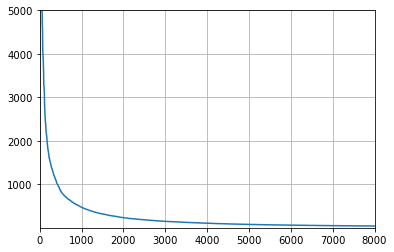

In [25]:
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [26]:
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'can',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'references',
 'comp',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'like',
 'people',
 'just',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'zaphod',
 'usenet',
 'think',
 'may',
 'alt',
 'politics',
 'windows',
 'also',
 'harvard',
 'time',
 'near',
 'rutgers',
 'eng',
 'use',
 'new',
 'rec',
 'good',
 'system',
 'noc',
 'soc',
 'sei',
 'crabapple',
 'das',
 'well',
 'xref',
 'cis',
 'now',
 'even',
 'see',
 'world',
 'europa',
 'gtefsd',
 'ece',
 'way',
 'uunet',
 'god',
 'religion',
 'org',
 'make',
 'two',
 'gov',
 'much',
 'many',
 'first',
 'say',
 'christian',
 'right',
 'rochester',
 'distribution',
 'max',
 'club',
 'space',
 'gatech',
 'andrew',
 'mail',
 'magnesium',
 'anyone',
 'u

In [27]:
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    for j in word:
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [28]:
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    for j in word:
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [29]:
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[3 1 0 ... 0 0 0]
 [8 1 0 ... 0 0 0]
 [5 3 8 ... 0 0 0]
 ...
 [7 3 7 ... 0 0 0]
 [9 1 1 ... 0 0 0]
 [3 1 0 ... 0 0 0]]
--------------------------
[[10  1  0 ...  0  0  3]
 [10  5  1 ...  0  0  0]
 [12  3  0 ...  0  0  0]
 ...
 [ 6  1  0 ...  0  0  0]
 [10  5  1 ...  0  0  0]
 [ 8  4  9 ...  0  0  0]]


In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [31]:
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.8939787957591518
Score on testing data: 0.8608
[[198   0   0   0   0   0   2   4   3   0   0   0   1   0   0   1   0   1
    1  30]
 [  0 188   7   9   9   9   9   1   0   0   0   0   4   1   0   0   0   0
    0   0]
 [  0   2 203  12   3  26   4   1   0   0   0   0   2   1   1   0   0   0
    0   0]
 [  0   2   4 214  40   0   2   1   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   2   1  16 228   1   4   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  15  16   2   5 191   3   1   1   0   0   1   5   0   4   0   0   0
    0   0]
 [  0   1   2   4   4   0 231   7   1   0   0   0   4   0   0   0   1   0
    0   0]
 [  0   0   0   1   0   0   8 228   7   1   3   0   3   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   0   3   6 266   1   0   0   1   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   5   2 208  13   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   0   1   3   5 226   0   1   1   0   0   0   0
   